## Importar las bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns     
import matplotlib.pyplot as plt
import datetime as dt
import warnings; warnings.simplefilter('ignore')

sns.set()

%matplotlib inline

## Importar el Dataset

In [2]:
datos = pd.read_csv("dataset/nyc_taxi_trip_duration.csv")

## Explorar el Dataset

In [3]:
datos.shape

(729322, 11)

In [4]:
datos.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
datos.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
datos.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


### Variables independientes

id - identificador único para cada viaje
vendor_id - código que indica el proveedor asociado con el registro del viaje
pickup_datetime - fecha y hora en que el medidor fue activado
dropoff_datetime - fecha y hora en que se desactivó el medidor
passenger_count - número de pasajeros en el vehículo (valor introducido por el conductor)
pickup_longitude - longitud en la que el medidor fue activado
pickup_latitude - latitud donde el medidor fue activado
dropoff_longitude - longitud en la que el medidor fue desactivado
dropoff_latitude - latitud en la que el medidor fue desactivado
store_and_fwd_flag - Esta bandera indica si el registro de viaje se mantuvo en la memoria del vehículo antes de enviarlo al proveedor porque el vehículo no tenía una conexión con el servidor - Y=almacenar y reenviar; N=no almacenar y reenviar el viaje.

### Variable objetivo

trip_duration - duración del viaje en segundos

### Valores nulos en nuestro dataset

In [7]:
datos.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Valores únicos en nuestro dataset

In [8]:
datos.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

### Resumen estadístico de nuestro dataset

In [9]:
datos.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


### Resultados


La identificación del vendedor tiene un valor mínimo de 1 y un valor máximo de 2, lo que tiene sentido ya que vimos que hay dos identificaciones de vendedor 1 y 2.
El número de pasajeros tiene un mínimo de 0, lo que significa que o bien es un error introducido o los conductores introdujeron deliberadamente 0 para completar un número objetivo de viajes.
La duración mínima del viaje es también bastante baja. Volveremos a esto más tarde durante el Análisis Univariado.

## Creación de nuevas columnas

En la exploración observamos que los campos que están nombrados como datetime son del tipo objeto, vamos a cambiar estos tipos de datos.
Adicionalmente vamos a crear nuevas columnas.

In [10]:
datos['pickup_datetime'] = pd.to_datetime(datos['pickup_datetime'])
datos['dropoff_datetime'] = pd.to_datetime(datos['dropoff_datetime'])

datos['pickup_day'] = datos['pickup_datetime'].dt.day_name()
datos['dropoff_day'] = datos['dropoff_datetime'].dt.day_name()

datos['pickup_day_no'] = datos['pickup_datetime'].dt.weekday
datos['dropoff_day_no'] = datos['dropoff_datetime'].dt.weekday

datos['pickup_hour'] = datos['pickup_datetime'].dt.hour
datos['dropoff_hour'] = datos['dropoff_datetime'].dt.hour

datos['pickup_month'] = datos['pickup_datetime'].dt.month
datos['dropoff_month'] = datos['dropoff_datetime'].dt.month

Hemos creado las siguientes columnas:

pickup_day y dropoff_day que contendrá el nombre del día en que se hizo el viaje.
pickup_day_no y dropoff_day_no que contendrá el número de día en lugar de los caracteres con Monday=0 y Sunday=6.
pickup_hour y dropoff_hour con una hora del día en el formato de 24 horas.
pickup_month y dropoff_month con el número de mes con January=1 y December=12.

### Función que nos permite determinar a qué hora del día se hizo el viaje

In [11]:
def time_of_day(x):
    if x in range(6,12):
        return 'Mañana'
    elif x in range(12,16):
        return 'Tarde'
    elif x in range(16,22):
        return 'Noche'
    else:
        return 'Madrugada'

Creamos dos columnas más

In [12]:
datos['pickup_timeofday'] = datos['pickup_hour'].apply(time_of_day)
datos['dropoff_timeofday'] = datos['dropoff_hour'].apply(time_of_day)

Importando la biblioteca que nos permite calcular la distancia desde las coordenadas geográficas.

In [13]:
# Si no está instalado geopy
# conda install -c conda-forge geopy

from geopy.distance import great_circle

### Función de tomar las coordenadas como entradas y devolvernos la distancia.

In [14]:
def cal_distance(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
 
 start_coordinates=(pickup_lat ,pickup_long)
 stop_coordinates=(dropoff_lat, dropoff_long)
 
 return great_circle(start_coordinates, stop_coordinates).km

Creamos la columna distance

In [15]:
datos['distance'] = datos.apply(lambda x: cal_distance(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude'] ), axis = 1)

## Analísis Univariante

### Trip duration

<AxesSubplot:xlabel='trip_duration'>

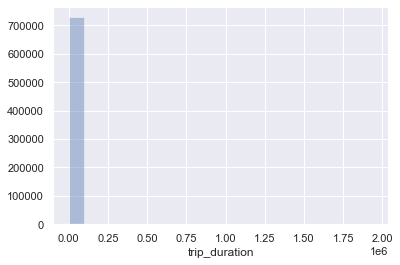

In [16]:
sns.distplot(datos['trip_duration'], kde = False, bins = 20)

El histograma está realmente sesgado como podemos ver.

<AxesSubplot:xlabel='trip_duration'>

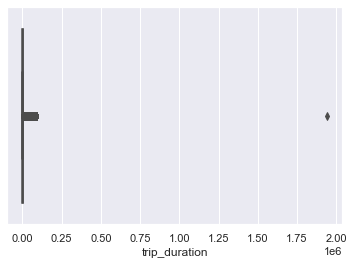

In [17]:
sns.boxplot(datos['trip_duration'])

Podemos ver claramente un valor atípico.

In [18]:
datos['trip_duration'].sort_values(ascending = False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
312992          1
398887          1
622664          1
323299          1
296874          1
Name: trip_duration, Length: 729322, dtype: int64

Podemos ver que hay una entrada que es significativamente diferente de las demás.
Como sólo hay una fila, dejemos esta fila.

In [19]:
datos.drop(datos[datos['trip_duration'] == 1939736].index, inplace = True)

### Vendor id

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

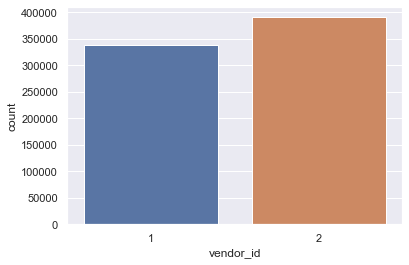

In [20]:
sns.countplot(x='vendor_id',data = datos)

Vemos que no hay mucha diferencia entre los viajes realizados por ambos vendedores.

### Passenger Count

In [21]:
datos.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

* Hay algunos viajes con incluso 0 pasajeros.
* Sólo hay 1 viaje para 7 y 9 pasajeros.

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

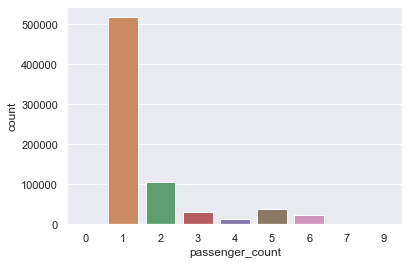

In [22]:
sns.countplot(x = 'passenger_count', data = datos)

Vemos que la mayor cantidad de viajes son con 1 pasajero.
Eliminemos las filas que tienen 0 o 7 o 9 pasajeros.

In [23]:
datos = datos[datos['passenger_count'] != 0]
datos = datos[datos['passenger_count'] <= 6]

In [24]:
datos.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

Ahora, eso parece una distribución limpia.

### Store and Forward Flag

In [25]:
datos['store_and_fwd_flag'].value_counts(normalize = True)

N    0.994463
Y    0.005537
Name: store_and_fwd_flag, dtype: float64

Vemos que hay menos de un 1% de viajes que fueron almacenados antes de ser reenviados.

### Distance

In [26]:
datos['distance'].value_counts()

0.000000     2893
0.000424       21
0.000424       19
0.000424       18
0.001273       13
             ... 
0.626853        1
2.298744        1
11.986954       1
1.458075        1
0.566500        1
Name: distance, Length: 726216, dtype: int64

Las razones de la distancia de 0 km pueden ser:

La ubicación de la caída no pudo ser rastreada.
El conductor tomó este viaje deliberadamente para completar un número de viaje objetivo.
Los pasajeros cancelaron el viaje.

Analizaremos estos viajes más a fondo en un análisis bivariado.

### Trips per Day

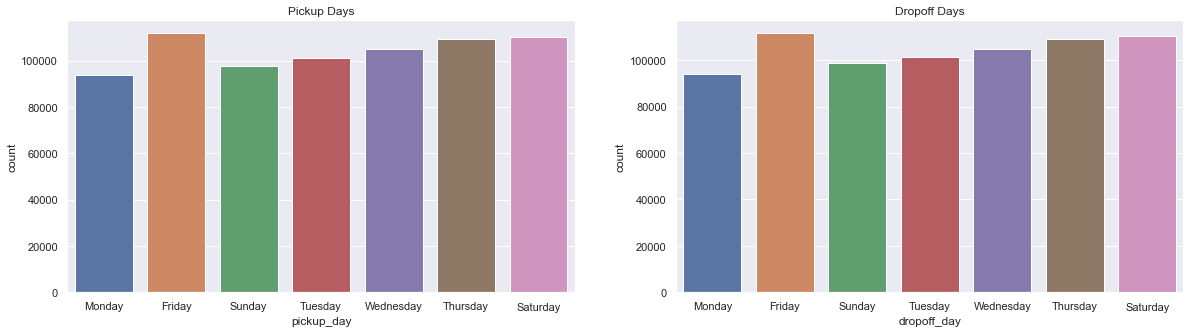

In [27]:
figure,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))

ax1.set_title('Pickup Days')
ax = sns.countplot(x = "pickup_day",data = datos, ax = ax1)

ax2.set_title('Dropoff Days')
ax = sns.countplot(x = "dropoff_day", data = datos, ax = ax2)

Vemos que los viernes son los días más concurridos, seguidos de los sábados. Esto se debe probablemente a que es fin de semana.

### Trips per Hour

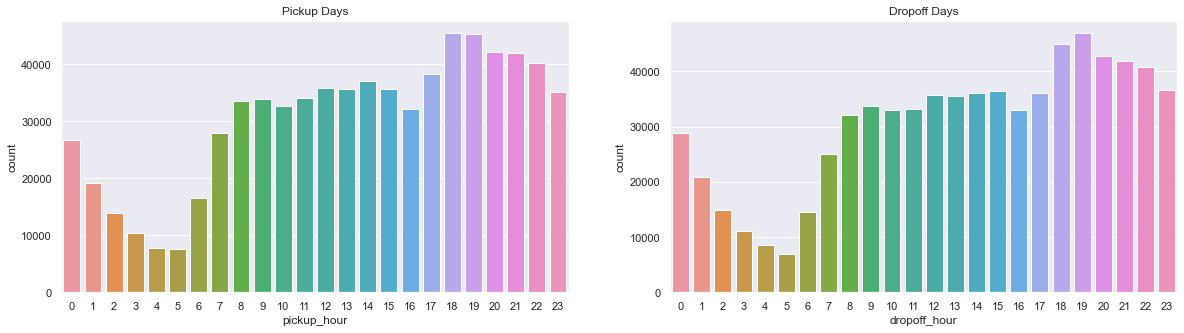

In [28]:
figure,(ax9, ax10) = plt.subplots(ncols = 2 ,figsize = (20, 5))

ax9.set_title('Pickup Days')
ax = sns.countplot(x = "pickup_hour", data = datos, ax = ax9)

ax10.set_title('Dropoff Days')
ax = sns.countplot(x = "dropoff_hour", data = datos, ax = ax10)

Vemos que las horas más concurridas son de 18:00 a 19:00 y eso tiene sentido, ya que es el momento en que la gente vuelve de sus oficinas.

### Trips per Time of Day

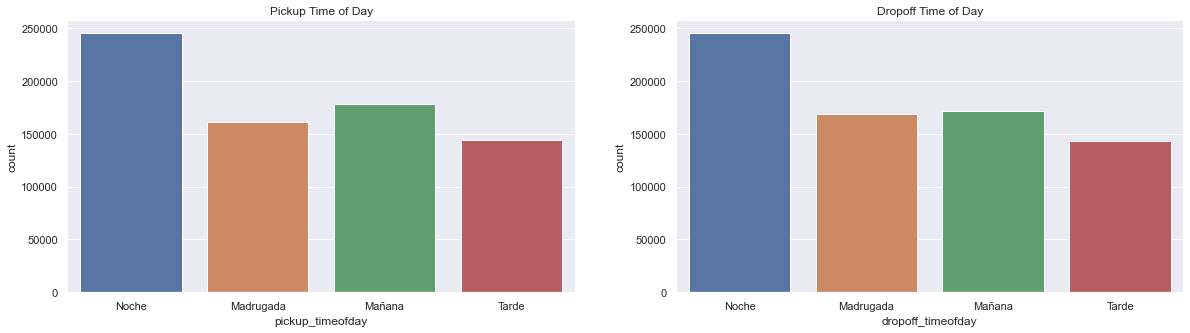

In [29]:
figure,(ax3, ax4) = plt.subplots(ncols = 2, figsize = (20, 5))

ax3.set_title('Pickup Time of Day')
ax = sns.countplot(x = "pickup_timeofday", data = datos, ax = ax3)

ax4.set_title('Dropoff Time of Day')
ax = sns.countplot(x = "dropoff_timeofday", data = datos, ax = ax4)

Como hemos visto anteriormente, las tardes son las más concurridas.

### Trips per month

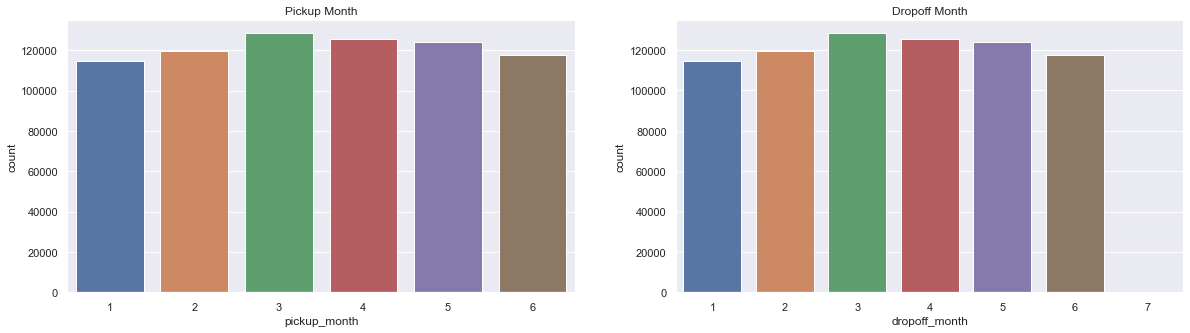

In [30]:
figure,(ax11, ax12) = plt.subplots(ncols = 2,figsize = (20, 5))

ax11.set_title('Pickup Month')
ax = sns.countplot(x = "pickup_month", data = datos, ax = ax11)

ax12.set_title('Dropoff Month')
ax = sns.countplot(x = "dropoff_month", data = datos, ax = ax12)

No hay mucha diferencia en el número de viajes entre meses.

## Análisis Bivariante

El análisis bivariante consiste en encontrar relaciones, patrones y correlaciones entre dos variables.

### Trip Duration per Vendor

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

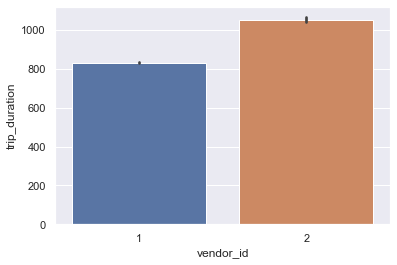

In [32]:
sns.barplot(y = 'trip_duration', x = 'vendor_id', data = datos, estimator = np.mean)

El vendedor 2 realiza viajes más largos en comparación con el vendedor 1.

### Trip Duration per Store and Forward Flag

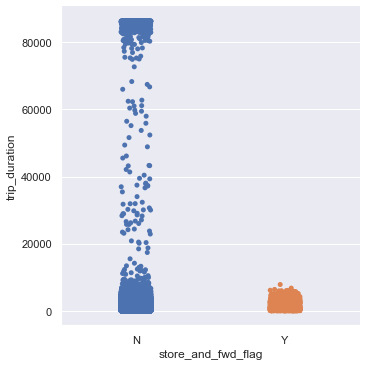

In [33]:
sns.catplot(y = 'trip_duration', x = 'store_and_fwd_flag', data = datos, kind = 'strip')

La duración del viaje es generalmente más larga para los viajes cuya bandera no fue almacenada.

### Trip Duration per passenger count

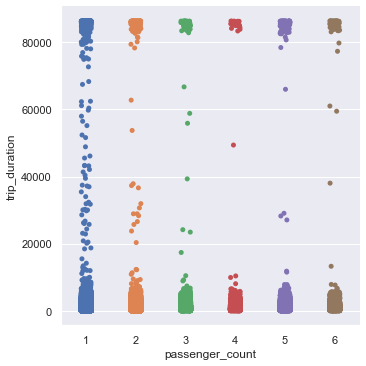

In [34]:
sns.catplot(y = 'trip_duration', x = 'passenger_count', data = datos, kind = 'strip')

No existe una relación visible entre la duración del viaje y el número de pasajeros.

### Trip Duration per hour

<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

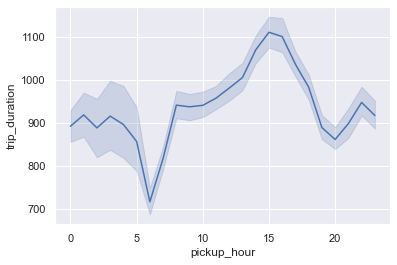

In [35]:
sns.lineplot(x = 'pickup_hour', y = 'trip_duration', data = datos)

Vemos que la duración del viaje es máxima hacia las 3 de la tarde, lo que puede deberse al tráfico en las carreteras.
La duración del viaje es la más baja alrededor de las 6 de la mañana, ya que las calles pueden no estar ocupadas.

### Trip Duration per time of day

<AxesSubplot:xlabel='pickup_timeofday', ylabel='trip_duration'>

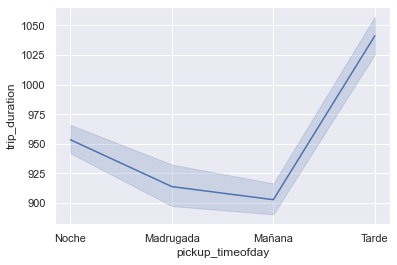

In [37]:
sns.lineplot(x = 'pickup_timeofday', y = 'trip_duration', data = datos)

Como hemos visto anteriormente, la duración del viaje es máxima por la tarde y mínima entre la noche y la mañana.

### Trip Duration per Day of Week

<AxesSubplot:xlabel='pickup_day_no', ylabel='trip_duration'>

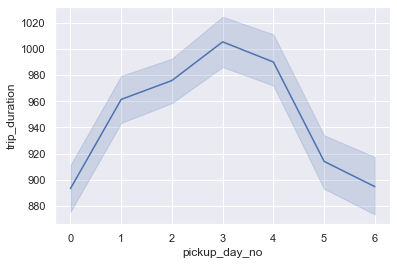

In [39]:
sns.lineplot(x = 'pickup_day_no', y = 'trip_duration', data = datos)

La duración del viaje es mayor los jueves, seguidos de cerca por los viernes.

### Trip Duration per month

<AxesSubplot:xlabel='pickup_month', ylabel='trip_duration'>

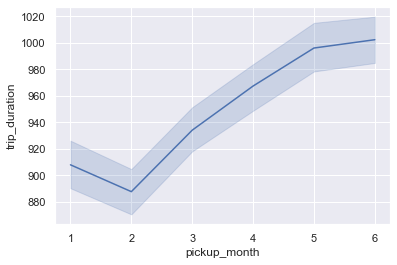

In [40]:
sns.lineplot(x = 'pickup_month', y = 'trip_duration', data = datos)

A partir de febrero, podemos ver que la duración de los viajes aumenta cada mes.

### Distance and Vendor

<AxesSubplot:xlabel='vendor_id', ylabel='distance'>

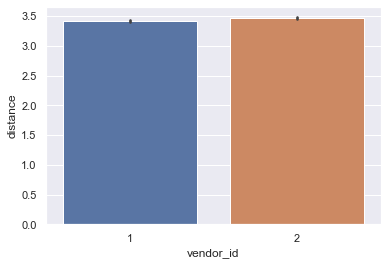

In [41]:
sns.barplot(y = 'distance', x = 'vendor_id', data = datos, estimator = np.mean)

The distribution for both vendors is very similar.

### Distance and Store and Forward Flag

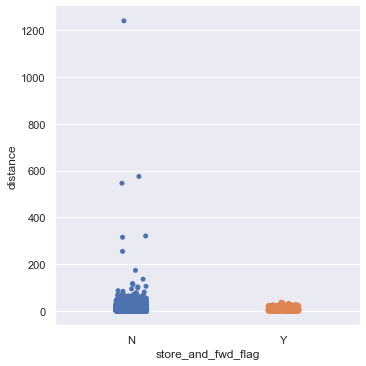

In [42]:
sns.catplot(y = 'distance', x = 'store_and_fwd_flag', data = datos, kind = 'strip')

Vemos que para distancias más largas el viaje no se guarda.

### Distance per passenger count

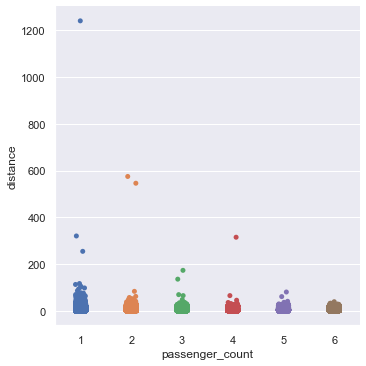

In [43]:
sns.catplot(y = 'distance', x = 'passenger_count', data = datos, kind = 'strip')

Vemos que algunas de las distancias más largas se cubren con viajes de 1, 2 o 4 pasajeros.

### Distance per day of week

<AxesSubplot:xlabel='pickup_day_no', ylabel='distance'>

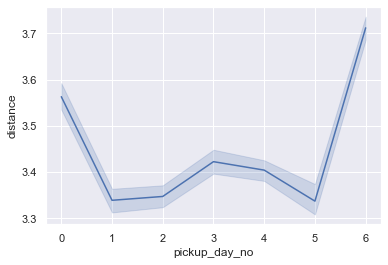

In [44]:
sns.lineplot(x = 'pickup_day_no', y = 'distance', data = datos)

* Las distancias son mayores los domingos, probablemente porque es fin de semana.
* Las distancias de los viajes de los lunes también son bastante elevadas.
* Esto probablemente signifique que en esos días puede haber desplazamientos fuera de la ciudad y/o que las calles están más concurridas.
 




### Distance per hour of day

<AxesSubplot:xlabel='pickup_hour', ylabel='distance'>

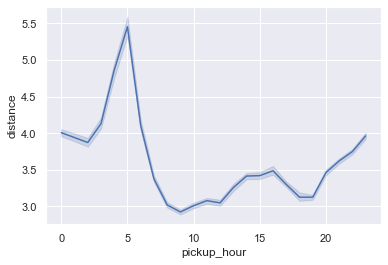

In [45]:
sns.lineplot(x = 'pickup_hour', y = 'distance', data = datos)

Las distancias son las más largas alrededor de las 5 de la mañana.

### Distance per time of day

<AxesSubplot:xlabel='pickup_timeofday', ylabel='distance'>

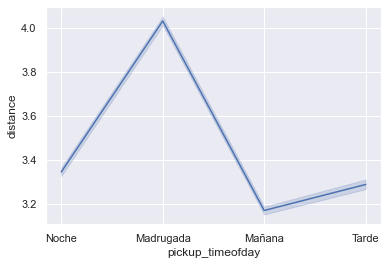

In [47]:
sns.lineplot(x = 'pickup_timeofday', y = 'distance', data = datos)

Como se ha visto anteriormente, las distancias son mayores a última hora de la noche o también a primera hora de la mañana.
Esto puede apuntar probablemente a los viajes fuera de la estación donde la gente comienza temprano para el día.

### Distance per month

<AxesSubplot:xlabel='pickup_month', ylabel='distance'>

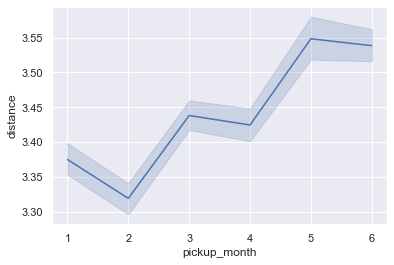

In [48]:
sns.lineplot(x = 'pickup_month', y = 'distance', data = datos)

Como también vimos en la duración del viaje por mes, de forma similar la distancia del viaje es la más baja en febrero y la máxima en junio.

### Passenger Count and Vendor id

<AxesSubplot:xlabel='vendor_id', ylabel='passenger_count'>

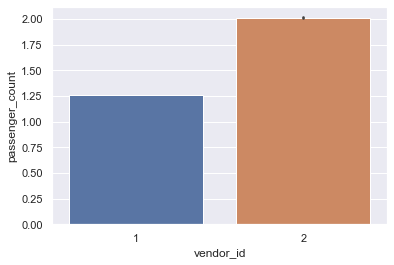

In [49]:
sns.barplot(y = 'passenger_count', x = 'vendor_id', data = datos)

Esto muestra que el vendedor 2 generalmente transporta 2 pasajeros mientras que el vendedor 1 transporta 1 pasajero.

### Trip Duration and Distance

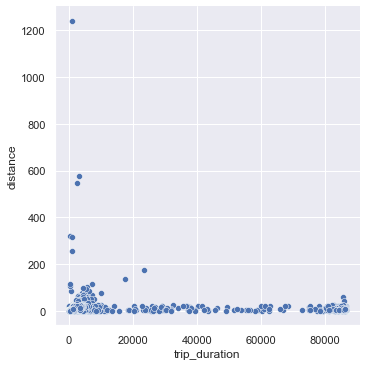

In [51]:
sns.relplot(y = datos.distance, x = 'trip_duration', data = datos)

Podemos ver que hay viajes con una duración de viaje tan corta como 0 segundos y que, sin embargo, cubren una gran distancia. Y, viajes con distancias de 0 km y duraciones de viaje largas.
Veamos algunas filas cuyas distancias son 0.

In [52]:
datos[datos.distance == 0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,...,Tuesday,1,1,11,11,6,6,Mañana,Mañana,0.0
327,id0786923,2,2016-03-26 13:34:38,2016-03-26 13:37:17,1,-73.996323,40.753460,-73.996323,40.753460,N,...,Saturday,5,5,13,13,3,3,Tarde,Tarde,0.0
795,id2323213,2,2016-06-13 16:49:52,2016-06-13 17:04:49,5,-73.967171,40.763500,-73.967171,40.763500,N,...,Monday,0,0,16,17,6,6,Noche,Noche,0.0
1176,id3235868,1,2016-02-29 21:39:52,2016-02-29 21:44:08,1,-73.995232,40.744038,-73.995232,40.744038,N,...,Monday,0,0,21,21,2,2,Noche,Noche,0.0
1257,id1865738,2,2016-03-13 11:38:36,2016-03-13 12:00:46,2,-73.912781,40.804428,-73.912781,40.804428,N,...,Sunday,6,6,11,12,3,3,Mañana,Tarde,0.0


In [53]:
datos[datos.distance == 0].tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
728720,id3423342,2,2016-05-05 21:32:43,2016-05-05 21:32:57,2,-73.977898,40.766392,-73.977898,40.766392,N,...,Thursday,3,3,21,21,5,5,Noche,Noche,0.0
728775,id2618105,2,2016-03-13 20:06:40,2016-03-13 20:14:24,1,-73.974258,40.759895,-73.974258,40.759895,N,...,Sunday,6,6,20,20,3,3,Noche,Noche,0.0
728838,id1232120,2,2016-05-29 04:04:32,2016-05-29 04:11:33,2,-73.984558,40.750839,-73.984558,40.750839,N,...,Sunday,6,6,4,4,5,5,Madrugada,Madrugada,0.0
729025,id3524028,2,2016-04-06 18:03:34,2016-04-06 18:26:23,1,-74.083611,40.632401,-74.083611,40.632401,N,...,Wednesday,2,2,18,18,4,4,Noche,Noche,0.0
729308,id3477255,2,2016-01-20 08:22:38,2016-01-20 08:47:35,1,-73.977859,40.749538,-73.977859,40.749538,N,...,Wednesday,2,2,8,8,1,1,Mañana,Mañana,0.0


Podemos ver que aunque la distancia se registra como 0, la duración del viaje es definitivamente mayor.

* Una de las razones puede ser que no se hayan registrado las coordenadas de bajada.
* Otra razón que se puede pensar es que, en el caso de viajes de corta duración, el pasajero haya cambiado de opinión y haya cancelado el viaje después de un tiempo.

#### Así, vemos cómo el Análisis Exploratorio de Datos nos ayuda a identificar patrones subyacentes en los datos, nos permite sacar conclusiones y esto sirve incluso como base de la ingeniería de características antes de empezar a construir nuestro modelo.